# @WeRateDogs : Twitter Data Analysis
**This data analysis project is a part of the Data Wrangling exercise within Udacity Data Analyst program.* 
<br>
<br>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Importing packages</a></li>
<li><a href="#gather">Gathering data</a></li>
<li><a href="#assess">Assessing data</a></li>
<li><a href="#clean">Cleaning data</a></li>
<li><a href="#store">Storing data</a></li>   
<li><a href="#descriptive">Descriptive analysis</a></li>
<li><a href="#exploratory">Exploratory analysis</a></li>
<li><a href="#con">Conclusions</a></li>   

<a id='intro'></a>
## Introduction

WeRateDogs, a prominent Twitter account, has captivated an audience of over 4 million followers by humorously rating people's dogs. These ratings consistently exhibit numerators greater than 10 with denominators of 10 – 11/10, 12/10, 13/10, and so on – reflecting the account's endearing sentiment toward dogs. This engagement has not only earned the account international media coverage but also necessitates the extraction of valuable insights from the WeRateDogs Twitter data.

The primary objective revolves around the meticulous wrangling of this data to facilitate insightful and credible analyses as well as compelling visualizations. While a substantial portion of the requisite data is provided by Udacity via the Twitter archive, certain vital attributes are absent and require retrieval through Twitter's API. Moreover, Udacity offers an image prediction dataset derived from a neural network that adeptly classifies dog breeds. This dataset includes the top three image predictions per tweet ID, along with corresponding image URLs and numbers indicating the most confident prediction.

Within the context of these three distinct datasets, the study endeavors to address three pivotal questions:

1. Which breed attains the highest rating?
2. Can an exploration of the data unveil the most well-received and favored tweets within the WeRateDogs community?
3. Does a higher rating correlate with increased popularity and likability of specific breeds?

While the initial questions are addressable through descriptive analyses, a more comprehensive exploration is required to unveil nuanced trends concerning the correlation factors within the WeRateDogs realm.

<a id='import'></a>
## Importing packages

In [3]:
import pandas as pd
import numpy as np
import requests
import time
import datetime
import random
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from tweepy import OAuthHandler
from timeit import default_timer as timer
import logging
import re
from wordcloud import WordCloud
from PIL import Image
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
%matplotlib inline

<a id='gather'></a>
## Gathering data

I have used three different methods to gather all the data required for the analysis. Firsly, I downloaded the twitter archive that was given directly by udacity. Secondly, an url containing the image predictions was provided and I downloaded the data using this url to load into a dataframe programmatically. 

The twitter archive doesn't provide all of the desired data. It doesn't provide us with the retweet and favourite counts data, which will be crucial for our exploratory analysis. Hence, I used web scrapping method to scrap off Twitter using Twitter API. 

**1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [4]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [5]:
# Downloading tweet image prediction data table using the requests library

download_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(download_url)
response

<Response [200]>

In [6]:
# Writing HTTP response (downloaded file)

file_images = download_url.split('/')[-1]
with open(os.path.join('./', file_images), mode = 'wb') as file:
    file.write(response.content)

In [7]:
#importing tsv file as csv with tab delimeter

df_predicts = pd.read_csv('image-predictions.tsv', sep='\t', dtype={"tweet_id": str})
df_predicts.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key ='0bcUSgfMF0Xi8Nr9PD2lWiBsy'
consumer_secret = 'U2cMm0u1mExAbyXO0dgoyeWRyRo60jkNTQ1UsSRvK6AYECC37a'
access_token = '1693606889009938432-9WthG7FanmvQQlN8b8u02pti9zHfIT'
access_token_secret = 'FtZ0TuuUcQ8ebNNj65xVIX48WBiqaQjWMAAQaHOew9K2I'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_ids = df_tarch.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
# reading the 'tweet-json.txt' file line by line

source_file = 'tweet_json.txt'
tweet_json = []
with open(source_file, 'r') as json_file:
    # start reading...
    line = json_file.readline()
    while line:
        data = json.loads(line)
        value_id = data['id']
        value_rc = data['retweet_count']
        value_fc = data['favorite_count']
        json_dic = {'tweet_id': value_id, 
                     'retweet_count': value_rc, 
                     'favorite_count': value_fc
                    }
        tweet_json.append(json_dic)
        # reading ..
        line = json_file.readline()

# initializing dataframe for tweet content using read data
df_tweet = pd.DataFrame(tweet_json, columns = ['tweet_id','retweet_count','favorite_count'])
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## Assessing data

After gathering the desired data for the analysis from three different sources, I began with assessing the data. Firstly, I tried to look for issues through visual assessment and then carried out a programmatic assessment for deeper understanding of the data. 

I placed the identified issues into two different categories:

Quality issues: It includes dirty data that has quality issues have issues with content like missing, duplicate, or incorrect data.

Tidiness issues: It includes messy data that has issues with its structure (columns, rows or table)

**Assessing tweet archive data**

In [10]:
#assessing tweet archive data visually

df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


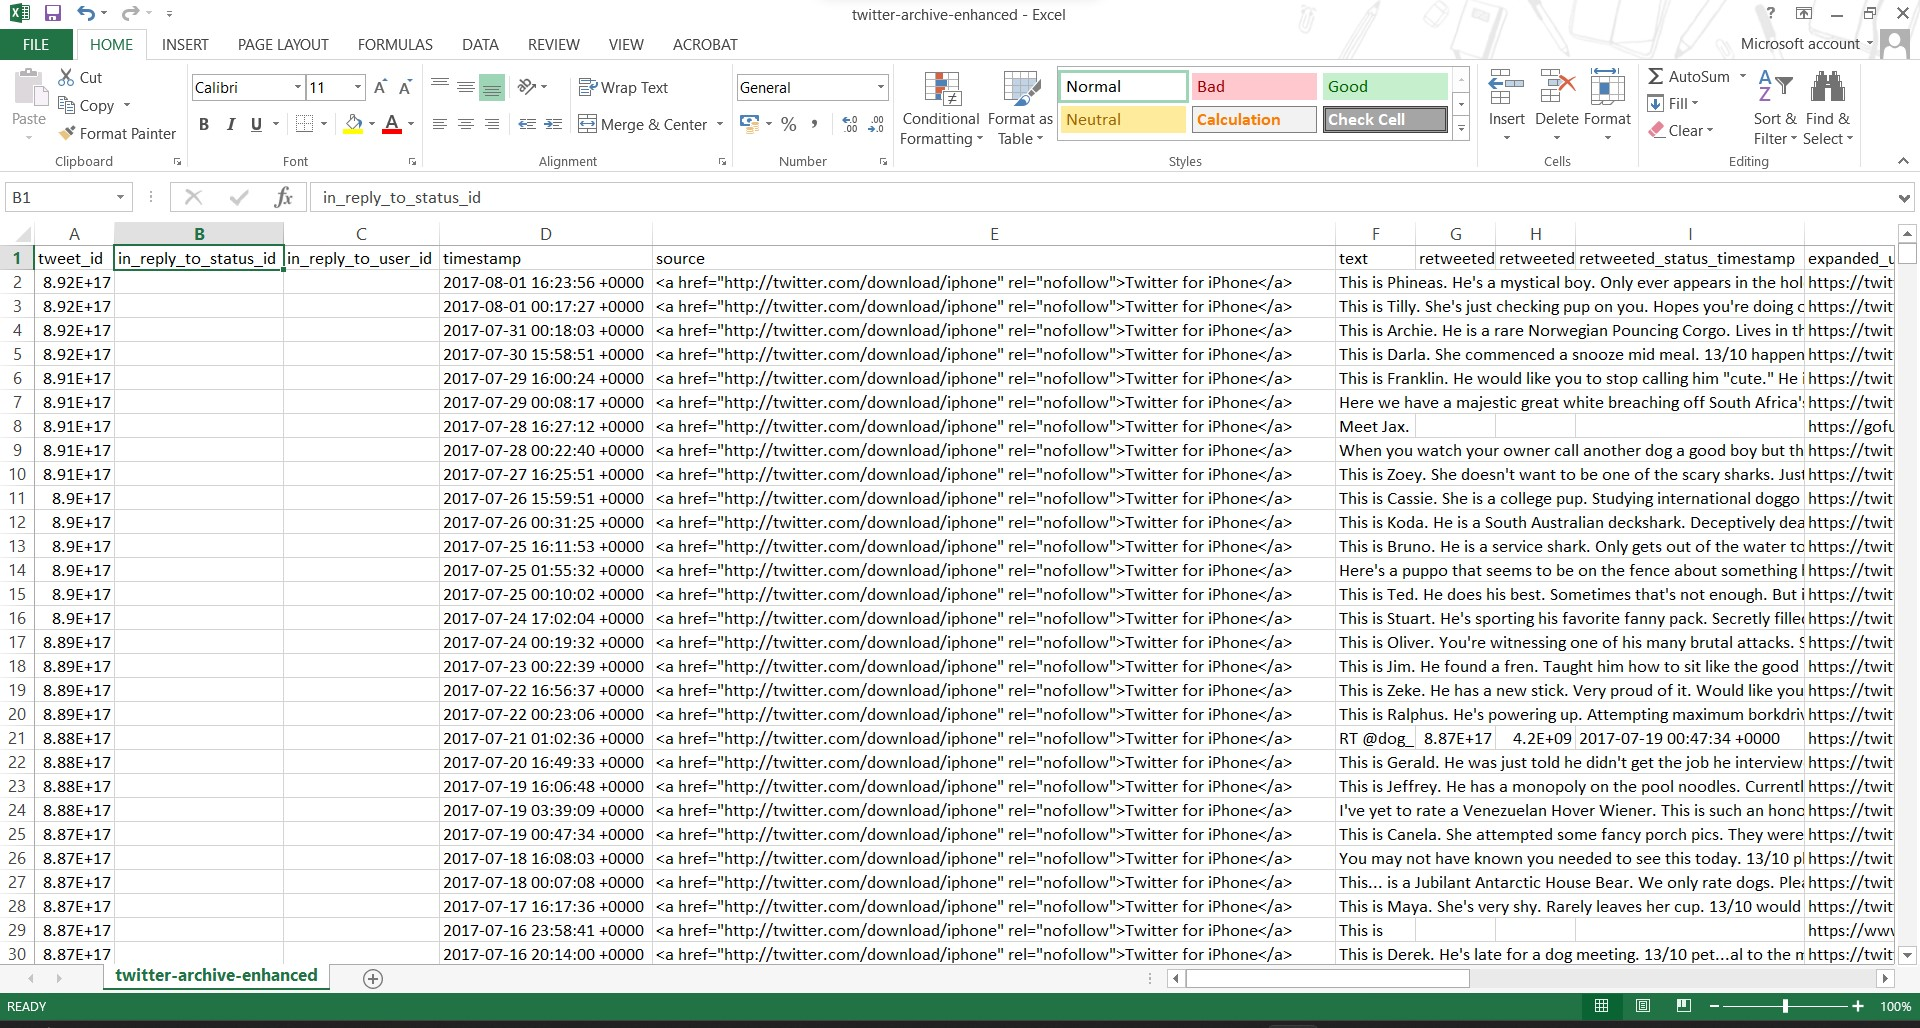

In [11]:
#assessing tweet archive data visually
# Microsoft excel was also used to view the data alongside.

from IPython.display import Image
Image("df_archive.jpg")

In [12]:
#assessing tweet archive data programatically

df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#assessing tweet archive data programatically

df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**Assessing predictions data**

In [14]:
#assessing predictions data visually
# Microsoft excel was also used to view the data alongside, offline.

df_predicts

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
#assessing predictions data programatically

df_predicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [16]:
#assessing predictions data programatically

df_predicts.describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


**Assessing tweet json data**

In [17]:
#assessing tweet json data visually
# Google Sheets was also used to view the data alongside, offline.

df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [18]:
#assessing predictions data programatically

df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [19]:
#assessing predictions data programatically

df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


<a id='issue_index'></a>

### Quality issues

</a><a href="#issue_1">1. *Retweets shouldn't be considered to meet project specifications. Column'retweeted_status_id' shows existence of retweets, which need to be cleaned up.*</a>

</a><a href="#issue_2">2. *Superflous information detected in tweet archive data. Columns 'retweeted_status_id', 'retweeted_status_user_id' ,' retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id' literally contain no usable info any further post deletion of retweets. Furthermore, they also contain a significant number of missing value markers in them ('NaN').*</a>

</a><a href="#issue_3">3. *Datatype error spotted for column 'timestamp' (decribed wrongly as `object`) in tweet archive data.*</a>

</a><a href="#issue_4">4. *Shorter versions of tweet urls in the 'text' column seem unnecessary (tweet archive data), with the urls already having a dedicated column (expanded_urls).*</a>

</a><a href="#issue_5">5. *Bad name entries exist in tweet archive data (those starting with lower case letters, like 'such', etc.).*</a>

</a><a href="#issue_6">6. *Predictions p2 and p3 seem uninteresting (image prediction data), when the one with the highest confidence level (p1) exists already.*</a>

</a><a href="#issue_7">7. *Programmatic analyses of tweet archive data and image prediction data indicate non-matching conts for the 'tweet_id' entries*</a>

</a><a href="#issue_8">8. *Inconsistent breed prediction names. Breed preduction names aren't of an aligned standard. Uppercase and lowercase letters seem to be mixed up (e.g. 'collie', 'Rotweiler'). Hyphens(-) and underscores(_) seem to be mixed up as well.*</a>

### Tidiness issues

</a><a href="#issue_9">9. *The 'source' column in the tweet archive data frame is messy with the html tag (ahref). It needs to be tidied up with just the source intact.*</a>

</a><a href="#issue_10">10. *Columns 'doggo', 'floofer', 'pupper', 'puppo' could be better depicted as variables under one 'dog_stage' header.*</a>

</a><a href="#issue_11">11. *Programatically, merging both datasets (tweet archive + image prediction) might result in a tidier dataset.*</a>

<a id='clean'></a>
## Cleaning data

Once the quality and tidiness issues with the three datasets were identified, the issues were fixed one by one. Firsly, copies of the original pieces of data were made before cleaning.

In [37]:
# Make copies of original pieces of data

df_archive_clean = df_archive.copy()
df_predicts_clean = df_predicts.copy()
df_tweet_clean = df_tweet.copy()

 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 1:

Retweets shouldn't be considered to meet project specifications. Column 'retweeted_status_id' shows existence of retweets, which need to be cleaned up.

**Define**

Clean up by removing retweets

**Code**

In [21]:
# checking the number of retweets present

df_archive_clean[df_archive_clean.retweeted_status_id.isnull()== False].count()[0]

181

In [22]:
# removing retweets and cleaning up.

df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()== True]

**Test**

In [23]:
# checking if the removal has been successful.

df_archive_clean[df_archive_clean.retweeted_status_id.isnull()== False].count()[0]

0

 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 2:

Superflous information detected in tweet archive data. Columns 'retweeted_status_id', 'retweeted_status_user_id' ,' retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id' literally contain no usable info, with significant missing value markers in them ('NaN').

**Define**

Clean up this quality issue by removing the corresponding columns in the dataframe.

**Code**

In [24]:
# removing superflous info

extras = ["in_reply_to_status_id","retweeted_status_user_id", "retweeted_status_timestamp", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_id"]
df_archive_clean = df_archive_clean.drop(extras, axis=1)

**Test**

In [25]:
# checking column list post cleaning

list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 3:

Datatype error spotted for column 'timestamp' (decribed wrongly as `object`) in tweet archive data.

**Define**

Clean up by switching the column to the `timestamp` datatype.

**Code**

In [26]:
# Switching datatype of timestamp column to timestamp

df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

**Test**

In [27]:
# checking if the change has been successful.

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 4:

Shorter versions of tweet urls in the 'text' column seem unnecessary (tweet archive data), with the urls already having a dedicated column (expanded_urls).

**Define**

Remove unnecessary short url characters

**Code**

In [28]:
# cleaning up urls within the text column

df_archive_clean['text'] = df_archive_clean.text.apply(lambda x : re.sub('http\S+','', x).strip())

**Test**

In [29]:
#checking url removal

df_archive_clean[['tweet_id','text']].sample(10)

,tweet_id,text
1259,710272297844797440,We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...
1684,681679526984871937,Can you spot Toby the guilty pupper? 7/10 woul...
2073,670995969505435648,Yea I can't handle this job anymore your dogs ...
267,841680585030541313,This is Penny. She's a dragon slayer. Feared b...
747,779834332596887552,This is Scout. He really wants to kiss himself...
1700,680959110691590145,This is Ozzie. He was doing fine until he lost...
1080,738891149612572673,@mount_alex3 13/10
951,751950017322246144,This is Lola. She's a surfing pupper. 13/10 ma...
1312,707014260413456384,This is Ellie. She requests to be carried arou...
2018,672139350159835138,This pup has a heart on its ass and that is do...


 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 5:

Bad name entries exist in tweet archive data (those starting with lower case letters, like 'such', etc.).

**Define**

Delete bad entries and replace them with a generic 'None'.

**Code**

In [30]:
# replacing bad lower case name entries with 'None'

df_archive_clean.name = df_archive_clean.name.apply(lambda x : 'None' if x[0].islower() else x)

**Test**

In [31]:
# Checking names

df_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [32]:
#Checking if there are still any null values

df_archive_clean['name'].isnull().values.any()

False

 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 6:

Predictions p2 and p3 seem uninteresting (image prediction data), when the one with the highest confidence level (p1) exists already. Some rows within p1 predictions are not dogs.

**Define**

Clean up by removing the second and third likely predictions. Rename p1 to 'breed' and p1_conf to 'confidence_level* for more clarity. Remove all rows where p1_dog = False

**Code**

In [38]:
# removing rows where p1_dog = False

df_predicts_clean = df_predicts_clean[df_predicts_clean['p1_dog'] == True]

In [39]:
df_predicts_clean['p1_dog'].unique()

array([ True])

In [40]:
# dropping unwanted info from the image prediction data frame
df_predicts_clean = df_predicts_clean[['tweet_id', 'jpg_url', 'p1', 'p1_conf']]

#renaming p1 to 'breed' and p1_conf to 'confidence_level'
df_predicts_clean = df_predicts_clean.rename(columns = {"p1":"breed", "p1_conf":"confidence"})

**Test**

In [41]:
# checking on the actions above.

df_predicts_clean

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 7:

Programmatic analyses of tweet archive data and image prediction data indicate non-matching counts for the 'tweet_id' entries.

**Define**

Match existing tweet_id entries, by removing missing predictions/tweets.

**Code**

In [42]:
# checking summary of tweet archive data

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [43]:
# checking summary of image prediction data

df_predicts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1532 non-null   object 
 1   jpg_url     1532 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.8+ KB


In [44]:
# change the datatype of tweet_id in the image prediction data into int64

df_predicts_clean['tweet_id'] = df_predicts_clean['tweet_id'].astype('int64')

In [45]:
# Clearly, there is a tweet_id count mismatch, as indicated in the summaries above (2175 vs 2075)
# Matching those values that exist for now, and removing the rest.
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id.isin(df_predicts_clean.tweet_id)]
df_predicts_clean = df_predicts_clean[df_predicts_clean.tweet_id.isin(df_archive_clean.tweet_id)]

# Matching the json tweet data as well (for future usage) 
df_tweet_clean = df_tweet_clean[df_tweet_clean.tweet_id.isin(df_predicts_clean.tweet_id)]

**Test**

In [46]:
# checking tweet_id count match post cleaning both dataframes

df_archive_clean.tweet_id.count() == df_predicts_clean.tweet_id.count()

True

In [40]:
# checking the datatype of tweet_id of the image predictions data

df_predicts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1477 non-null   int64  
 1   jpg_url     1477 non-null   object 
 2   breed       1477 non-null   object 
 3   confidence  1477 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 57.7+ KB


 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 8:

Inconsistent breed prediction names. Breed preduction names aren't of an aligned standard. Uppercase and lowercase letters seem to be mixed up (e.g. 'collie', 'Rotweiler'). Hyphens(-) and underscores(_) seem to be mixed up as well.

**Define**

Replace spaces (' ') and hyphens ('-') with underscores('_'). Convert all breed characters to lowercase letters.

**Code**

In [47]:
# Replacing spaces (' ') and hyphens ('-') with underscores('_')

df_predicts_clean.breed = df_predicts_clean.breed.str.replace(' ','_')
df_predicts_clean.breed = df_predicts_clean.breed.str.replace('-','_')

In [48]:
# Converting all breed names to lowercase 

df_predicts_clean.breed = df_predicts_clean.breed.str.lower()

**Test**

In [49]:
# Checking name standardization

df_predicts_clean.breed.unique()

array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
       'rhodesian_ridgeback', 'miniature_pinscher',
       'bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'gordon_setter', 'walker_hound', 'pug',
       'bloodhound', 'lhasa', 'english_setter', 'italian_greyhound',
       'maltese_dog', 'malamute', 'soft_coated_wheaten_terrier',
       'chihuahua', 'black_and_tan_coonhound', 'toy_terrier',
       'blenheim_spaniel', 'pembroke', 'chesapeake_bay_retriever',
       'curly_coated_retriever', 'dalmatian', 'ibizan_hound',
       'border_collie', 'labrador_retriever', 'miniature_schnauzer',
       'airedale', 'west_highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'rottweiler', 'siberian_husky',
       'papillon', 'saint_bernard', 'tibetan_terrier', 'borzoi', 'beagle',
       'yorkshire_terrier', 'pomeranian', 'kuvasz',
       'flat_coated_retriever', 'norwegian_elkhound', 'standard_poodle',
       'staffordshire_bullterrier

 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 9:

The 'source' column in the tweet archive data frame is messy with the html tag (ahref). It needs to be tidied up with just the source intact.

**Define**

Clean up HTML tags and retain source information.

**Code**

In [50]:
# remove tags before and after actual source info (e.g. Twitter for iPhone, TweetDeck, etc.)

df_archive_clean.source = df_archive_clean.source.apply(lambda x : re.findall('[A-Z][a-zA-Z\s]*', x)[0])

**Test**

In [51]:
# Checking source content

df_archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 10:

Columns 'doggo', 'floofer', 'pupper', 'puppo' could be better depicted as variables under one 'dog_stage' header.

**Define**

Clean up by clubbing all dog stages under one column header.

**Code**

In [52]:
# Build column header 'dog_stage' by extracting relevant variables

df_archive_clean['dog_stage'] = df_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [53]:
# Delete excess columns post extraction

df_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

**Test**

In [54]:
# checking for success 

df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN


In [55]:
# checking for success.

df_archive_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

 <a id='issue_1'>
    <a href="#issue_index">Click to scroll back to issues' index</a>

### ISSUE 11:

Programatically, merging all datasets (tweet archive + image prediction + tweet json) might result in a tidier dataset.

**Define**

Clean up by combining all datasets aligned by the tweet_id.

**Code**

In [56]:
# Merging all three datasets

df_merged = pd.merge(df_archive_clean, df_predicts_clean, how="inner", on = "tweet_id")
df_merged = pd.merge(df_merged, df_tweet_clean, how="inner", on = "tweet_id")
df_merged.reset_index(drop=True, inplace=True)

**Test**

In [57]:
# checking merged dataframe programatically.

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1531 non-null   int64  
 1   in_reply_to_status_id       14 non-null     float64
 2   in_reply_to_user_id         14 non-null     float64
 3   timestamp                   1531 non-null   object 
 4   source                      1531 non-null   object 
 5   text                        1531 non-null   object 
 6   retweeted_status_id         54 non-null     float64
 7   retweeted_status_user_id    54 non-null     float64
 8   retweeted_status_timestamp  54 non-null     object 
 9   expanded_urls               1531 non-null   object 
 10  rating_numerator            1531 non-null   int64  
 11  rating_denominator          1531 non-null   int64  
 12  name                        1531 non-null   object 
 13  dog_stage                   246 n

In [58]:
# checking merged dataframe visually.

df_merged

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,6514,33819
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,4328,25461
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,0.425595,3261,20562
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703,2158,12041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,41,111
1527,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,147,311
1528,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,47,128
1529,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,48,132


 <a id='storing_data'>
        <a href="#issue_index">CLICK TO SCROLL BACK TO ISSUES' INDEX</a>

<a id='store'></a>
## Storing data

After all the datasets had been assessed and cleaned, the merged dataset was stored to a new csv file named "twitter_archive_master.csv".

In [59]:
# saving cleaned dataset as specified.

df_merged.to_csv("twitter_archive_master.csv")

<a id='descriptive'></a>
## Descriptive analysis 

Research question 1: **Which breed attains the highest rating?**

In [60]:
# Group the data by breed and calculate the average rating for each breed

average_ratings = df_merged.groupby('breed')['rating_numerator'].mean()
average_ratings.head()

breed
afghan_hound                      10.500000
airedale                           9.833333
american_staffordshire_terrier    11.000000
appenzeller                       11.000000
australian_terrier                11.500000
Name: rating_numerator, dtype: float64

In [61]:
# Sort the average ratings in descending order

sorted_average_ratings = average_ratings.sort_values(ascending=False)
sorted_average_ratings

breed
clumber                        27.000000
soft_coated_wheaten_terrier    25.454545
west_highland_white_terrier    15.642857
great_pyrenees                 14.928571
borzoi                         14.444444
                                 ...    
scotch_terrier                  9.000000
welsh_springer_spaniel          9.000000
ibizan_hound                    9.000000
norwich_terrier                 9.000000
japanese_spaniel                5.000000
Name: rating_numerator, Length: 111, dtype: float64

### ISSUE 12:

There seems to be some unusual outliers within the rating_numerator.

**Define**

The outliers need to be removed for more accurate results.

**Code**

In [62]:
# After visual assessment of the excel document of df_merged, it is decided that all ratings above 13 are to be removed

df_merged = df_merged[df_merged['rating_numerator'] <= 13]

**Test**

In [63]:
# Group the data by breed and calculate the average rating for each breed

average_ratings = df_merged.groupby('breed')['rating_numerator'].mean()
average_ratings

breed
afghan_hound                      10.500000
airedale                           9.833333
american_staffordshire_terrier    11.000000
appenzeller                       11.000000
australian_terrier                11.500000
                                    ...    
welsh_springer_spaniel             9.000000
west_highland_white_terrier       10.384615
whippet                           10.444444
wire_haired_fox_terrier           11.500000
yorkshire_terrier                 10.500000
Name: rating_numerator, Length: 110, dtype: float64

In [64]:
# Sort the average ratings in descending order

sorted_average_ratings = average_ratings.sort_values(ascending=False)
sorted_average_ratings

breed
saluki                         12.500000
tibetan_mastiff                12.400000
briard                         12.333333
border_terrier                 12.142857
giant_schnauzer                12.000000
                                 ...    
welsh_springer_spaniel          9.000000
norwich_terrier                 9.000000
soft_coated_wheaten_terrier     8.777778
black_and_tan_coonhound         7.000000
japanese_spaniel                5.000000
Name: rating_numerator, Length: 110, dtype: float64

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

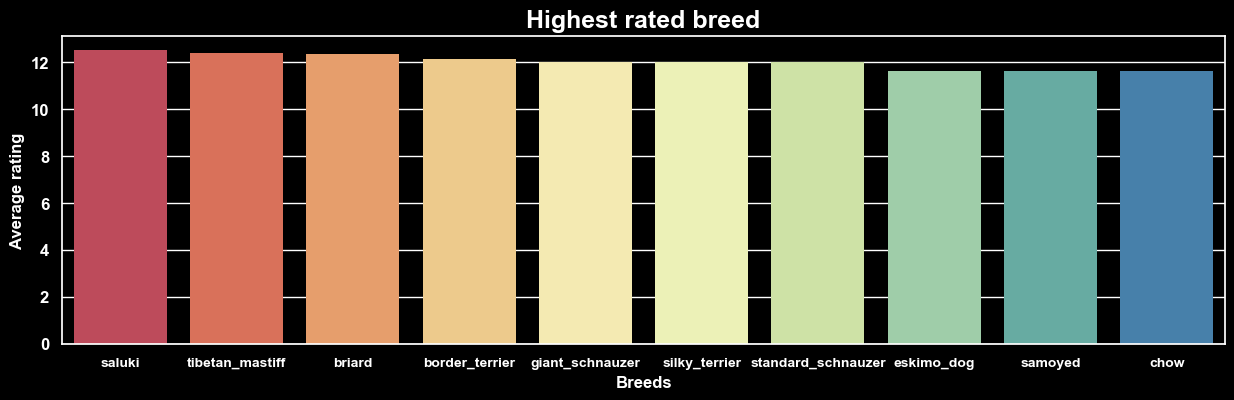

In [65]:
# Select the top 10 
top_10_categories = sorted_average_ratings.nlargest(10)

sns.set(rc = {'figure.figsize':(15, 4)})
sns.set_style("whitegrid")

# Set Seaborn style to dark background
plt.style.use("dark_background")

# Using Seaborn for bar plot
barplot = sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='Spectral', edgecolor='white', linewidth=0)
plt.xlabel('Breeds', fontsize=12, fontweight='bold')
plt.ylabel('Average rating', fontsize=12, fontweight='bold')
plt.title('Highest rated breed', fontsize=18, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

In [66]:
barplot.figure.savefig('high_res_most_rated_breed', dpi=300)

Research question 2: **Can an exploration of the data unveil the most well-received and favored tweets within the WeRateDogs community?**

In [67]:
# Most popular tweet (in terms of highest retweet count)
# Find the row with the maximum retweet_count

row_with_max_retweets = df_merged.loc[df_merged['retweet_count'].idxmax()]
row_with_max_retweets

tweet_id                                                     744234799360020481
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-06-18 18:26:18 +0000
source                                                       Twitter for iPhone
text                          Here's a doggo realizing you can stand in a po...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [68]:
# Define the desired width and height for the displayed image
width = 150  # Adjust as needed
height = 25  # Adjust as needed

# Display the resized image using IPython.display.Image
Image(url=row_with_max_retweets['jpg_url'], width=width, height=height)

In [69]:
# Most popular tweet (in terms of highest favorite count)
# Find the row with the highest favorite count

row_with_high_fav = df_merged.loc[df_merged['favorite_count'].idxmax()]
row_with_high_fav

tweet_id                                                     822872901745569793
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-01-21 18:26:02 +0000
source                                                       Twitter for iPhone
text                          Here's a super supportive puppo participating ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [70]:
# Define the desired width and height for the displayed image
width = 200  # Adjust as needed
height = 100  # Adjust as needed

# Display the resized image using IPython.display.Image
Image(url=row_with_high_fav['jpg_url'], width=width, height=height)

In [71]:
# Most rated tweet (in terms of highest rating)
# Find the row with the maximum rating

row_with_max_rating = df_merged.loc[df_merged['rating_numerator'].idxmax()]
row_with_max_rating

tweet_id                                                     892177421306343426
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-08-01 00:17:27 +0000
source                                                       Twitter for iPhone
text                          This is Tilly. She's just checking pup on you....
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/892177421...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [72]:
# Define the desired width and height for the displayed image
width = 200  # Adjust as needed
height = 50  # Adjust as needed

# Display the resized image using IPython.display.Image
Image(url=row_with_max_rating['jpg_url'], width=width, height=height)

<a id='exploratory'></a>
## Exploratory analysis 

Research question 3: **Does a higher rating correlate with increased popularity and likability of specific breeds?**

In [73]:
# Copying data and dropping unnecessary info

df_analysis = df_merged.copy()
df_analysis.drop(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name', 'dog_stage', 'jpg_url','confidence','rating_denominator'], axis=1, inplace=True)
df_analysis

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,breed,retweet_count,favorite_count
0,NaN,NaN,NaN,NaN,NaN,13,chihuahua,6514,33819
1,NaN,NaN,NaN,NaN,NaN,12,chihuahua,4328,25461
2,NaN,NaN,NaN,NaN,NaN,12,basset,9774,41048
3,NaN,NaN,NaN,NaN,NaN,13,chesapeake_bay_retriever,3261,20562
4,NaN,NaN,NaN,NaN,NaN,13,appenzeller,2158,12041
...,...,...,...,...,...,...,...,...,...
1526,NaN,NaN,NaN,NaN,NaN,5,miniature_pinscher,41,111
1527,NaN,NaN,NaN,NaN,NaN,6,rhodesian_ridgeback,147,311
1528,NaN,NaN,NaN,NaN,NaN,9,german_shepherd,47,128
1529,NaN,NaN,NaN,NaN,NaN,7,redbone,48,132


In [74]:
# Calculate average favorite counts and retweet counts for each breed

average_counts = df_analysis.groupby('breed')[['favorite_count', 'retweet_count','rating_numerator']].mean()
average_counts

,favorite_count,retweet_count,rating_numerator
breed,,,
afghan_hound,12995.000000,7162.750000,10.500000
airedale,5280.833333,1393.750000,9.833333
american_staffordshire_terrier,7559.538462,2204.923077,11.000000
appenzeller,7317.500000,1458.000000,11.000000
australian_terrier,11127.500000,3078.500000,11.500000
...,...,...,...
welsh_springer_spaniel,2699.000000,517.000000,9.000000
west_highland_white_terrier,5966.615385,1387.923077,10.384615
whippet,8075.111111,2298.000000,10.444444


In [75]:
average_counts = average_counts.reset_index()
average_counts

,breed,favorite_count,retweet_count,rating_numerator
0,afghan_hound,12995.000000,7162.750000,10.500000
1,airedale,5280.833333,1393.750000,9.833333
2,american_staffordshire_terrier,7559.538462,2204.923077,11.000000
3,appenzeller,7317.500000,1458.000000,11.000000
4,australian_terrier,11127.500000,3078.500000,11.500000
...,...,...,...,...
105,welsh_springer_spaniel,2699.000000,517.000000,9.000000
106,west_highland_white_terrier,5966.615385,1387.923077,10.384615
107,whippet,8075.111111,2298.000000,10.444444
108,wire_haired_fox_terrier,8538.500000,2923.500000,11.500000


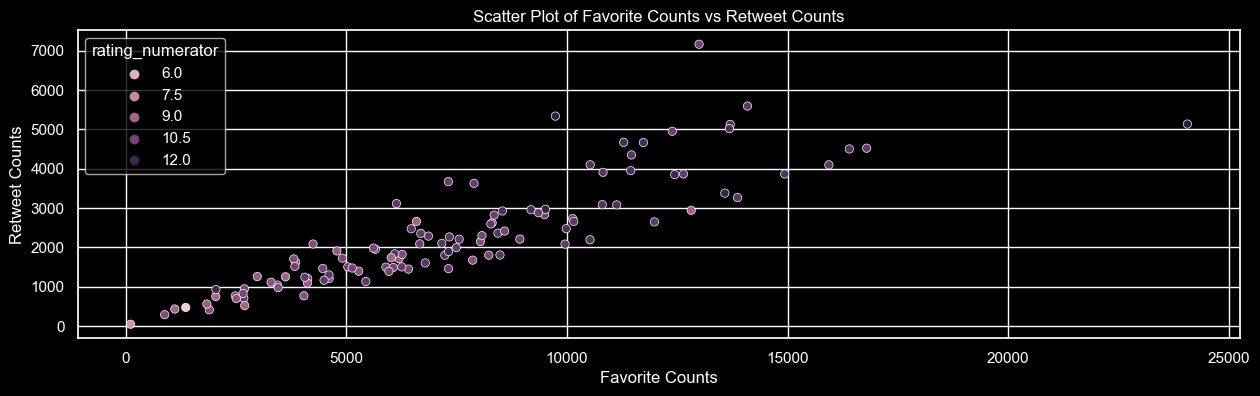

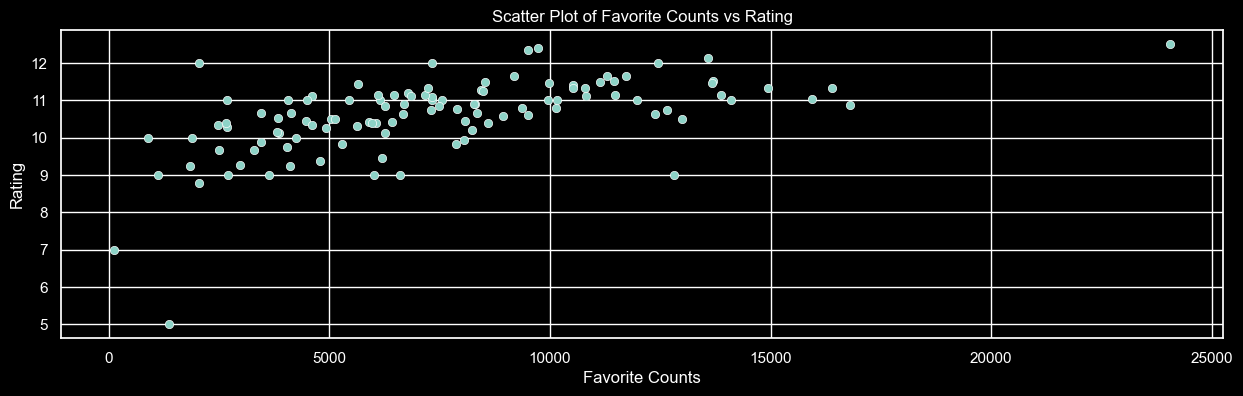

In [76]:
# Calculate the correlation matrix
correlation_matrix = average_counts[['favorite_count', 'retweet_count', 'rating_numerator']].corr()

# Create scatter plots
sns.scatterplot(data=average_counts, x='favorite_count', y='retweet_count', hue='rating_numerator')
plt.title('Scatter Plot of Favorite Counts vs Retweet Counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.show()

sns.scatterplot(data=average_counts, x='favorite_count', y='rating_numerator')
plt.title('Scatter Plot of Favorite Counts vs Rating')
plt.xlabel('Favorite Counts')
plt.ylabel('Rating')
plt.show()

In [77]:
# Hypothesis testing (example: t-test)
high_rating_counts = average_counts[average_counts['rating_numerator'] > 4.0]['favorite_count']
low_rating_counts = average_counts[average_counts['rating_numerator'] <= 4.0]['favorite_count']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(high_rating_counts, low_rating_counts)
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')

T-test results: t-statistic = nan, p-value = nan


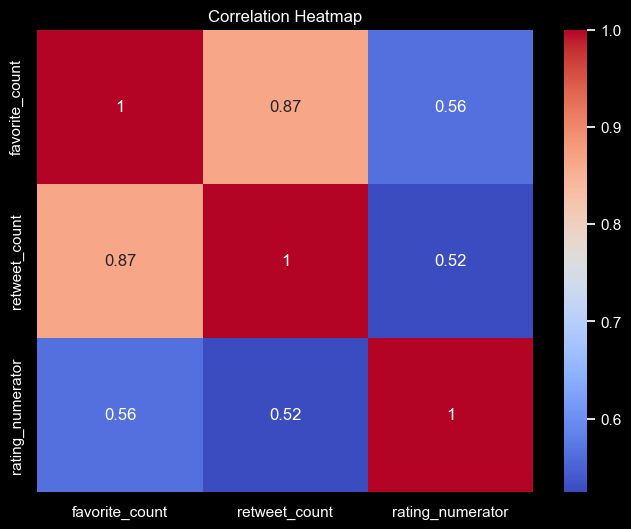

In [78]:
# Set the figure size for the heatmap
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

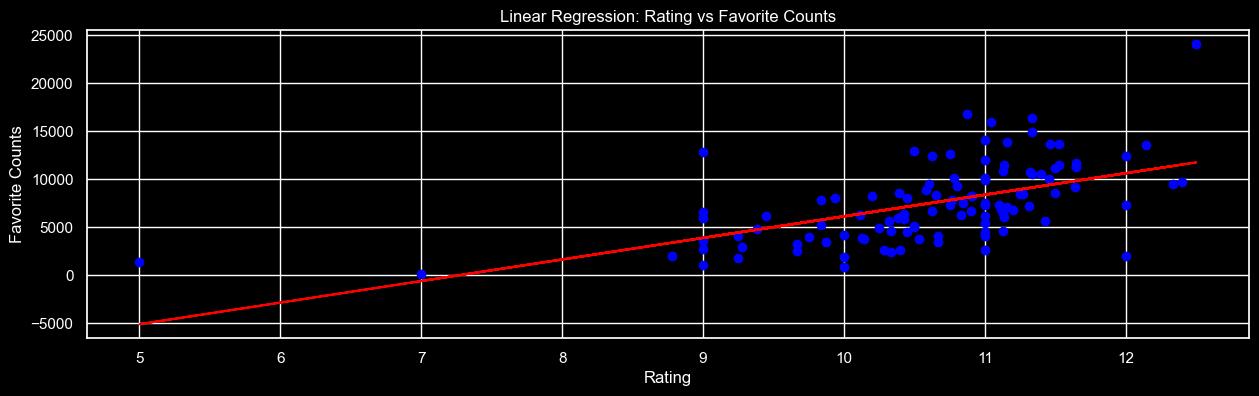

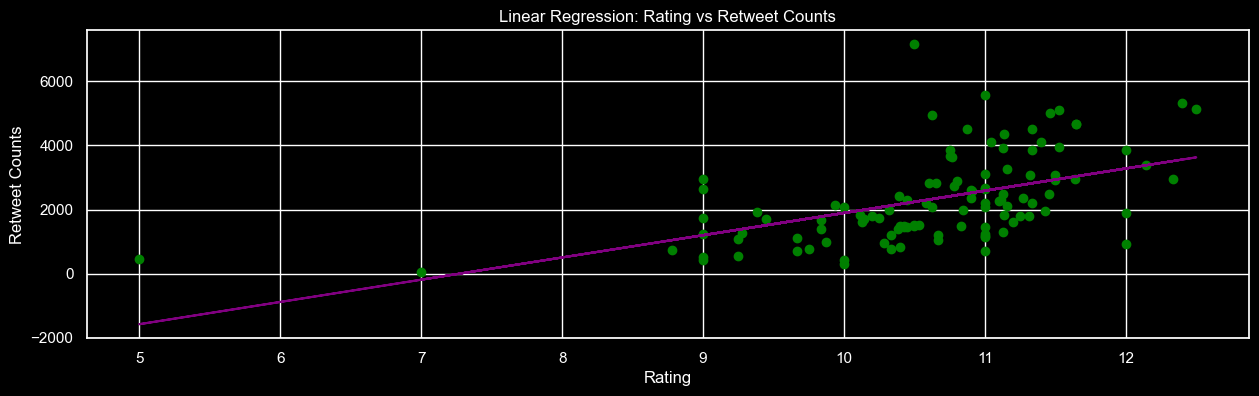

In [79]:
# Regression analysis for favorite counts and rating
X_favorite = average_counts[['rating_numerator']]
y_favorite = average_counts['favorite_count']
regression_model_favorite = LinearRegression()
regression_model_favorite.fit(X_favorite, y_favorite)
plt.scatter(X_favorite, y_favorite, color='blue')
plt.plot(X_favorite, regression_model_favorite.predict(X_favorite), color='red')
plt.title('Linear Regression: Rating vs Favorite Counts')
plt.xlabel('Rating')
plt.ylabel('Favorite Counts')
plt.show()

# Regression analysis for retweet counts and rating
X_retweet = average_counts[['rating_numerator']]
y_retweet = average_counts['retweet_count']
regression_model_retweet = LinearRegression()
regression_model_retweet.fit(X_retweet, y_retweet)
plt.scatter(X_retweet, y_retweet, color='green')
plt.plot(X_retweet, regression_model_retweet.predict(X_retweet), color='purple')
plt.title('Linear Regression: Rating vs Retweet Counts')
plt.xlabel('Rating')
plt.ylabel('Retweet Counts')
plt.show()

In [80]:
# Create a new column to categorize ratings (you can adjust the ranges)
average_counts['rating_category'] = pd.cut(average_counts['rating_numerator'], bins=[0, 5, 9, 13], labels=['Low', 'Medium', 'High'])
average_counts

,breed,favorite_count,retweet_count,rating_numerator,rating_category
0,afghan_hound,12995.000000,7162.750000,10.500000,High
1,airedale,5280.833333,1393.750000,9.833333,High
2,american_staffordshire_terrier,7559.538462,2204.923077,11.000000,High
3,appenzeller,7317.500000,1458.000000,11.000000,High
4,australian_terrier,11127.500000,3078.500000,11.500000,High
...,...,...,...,...,...
105,welsh_springer_spaniel,2699.000000,517.000000,9.000000,Medium
106,west_highland_white_terrier,5966.615385,1387.923077,10.384615,High
107,whippet,8075.111111,2298.000000,10.444444,High
108,wire_haired_fox_terrier,8538.500000,2923.500000,11.500000,High


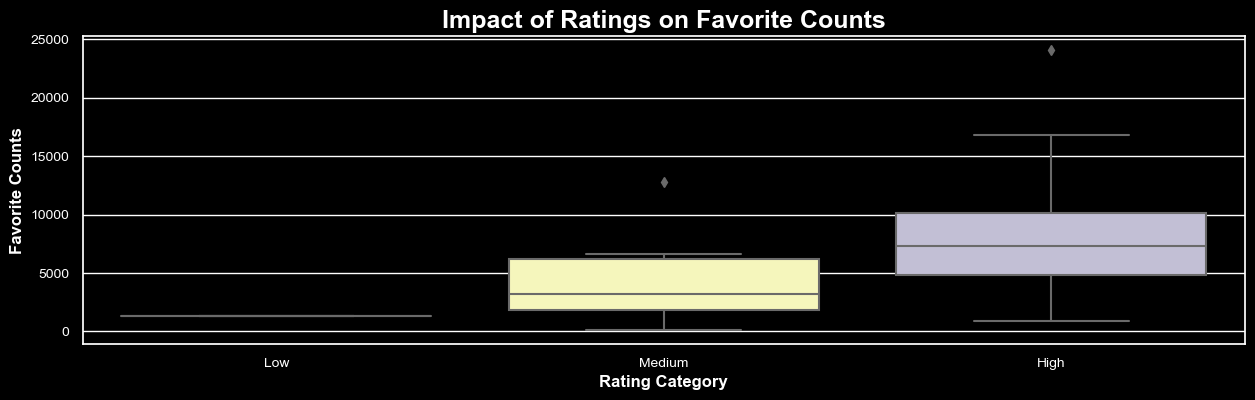

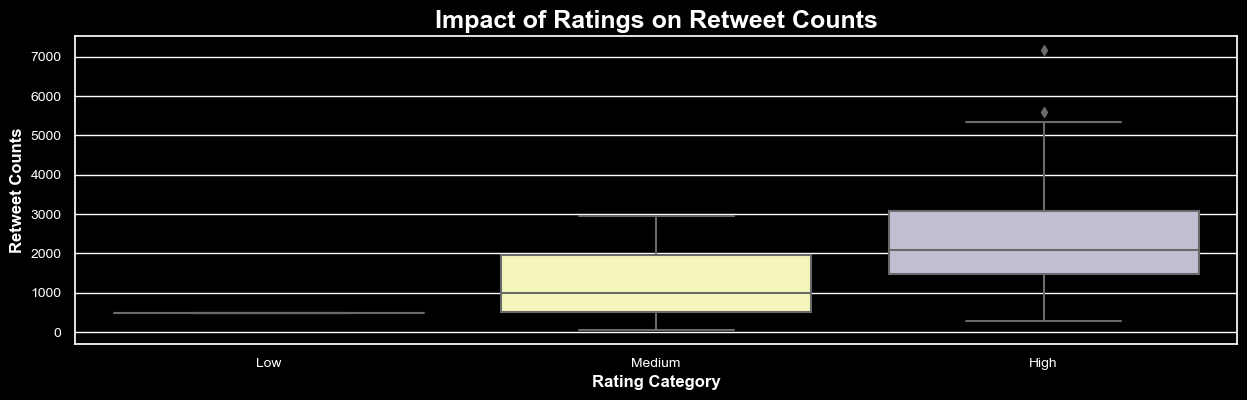

In [81]:
# Set Seaborn style to dark background
plt.style.use("dark_background")

# Box plot for Favorite Counts by Rating Category
sns.boxplot(data=average_counts, x='rating_category', y='favorite_count')
plt.title('Impact of Ratings on Favorite Counts', fontsize=18, fontweight='bold')
plt.xlabel('Rating Category', fontsize=12, fontweight='bold')
plt.ylabel('Favorite Counts', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Box plot for Retweet Counts by Rating Category
sns.boxplot(data=average_counts, x='rating_category', y='retweet_count')
plt.title('Impact of Ratings on Retweet Counts', fontsize=18, fontweight='bold')
plt.xlabel('Rating Category', fontsize=12, fontweight='bold')
plt.ylabel('Retweet Counts', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<a id='con'></a>
## Conclusions

Research question 1: **Which breed attains the highest rating?**

Upon analyzing the data, it becomes evident that the **Saluki** breed consistently secures the highest ratings within the WeRateDogs dataset. With an impressive average rating hovering around 13, Salukis stand out as the breed with the most favorable evaluations. This distinction is closely pursued by the Tibetan Mastiff and Briard breeds, both of which garner notably elevated average ratings. 

Research question 2: **Can an exploration of the data unveil the most well-received and favored tweets within the WeRateDogs community?**

Exploring the WeRateDogs data has unveiled a fascinating diversity in what constitutes the most well-received and favored tweets within the community. Interestingly, this distinction varies across three key metrics: highest retweet count, highest favorite count, and highest rating.

In the realm of retweets, the most popular tweet features a **Labrador Retriever** joyfully discovering the joy of standing in a pool – a lighthearted moment that resonated widely. Conversely, when gauging favorability, a **Lakeland Terrier** actively engaging in a march emerged as the community's favorite, showcasing the enthusiasm for dogs participating in various activities.

However, the metric of highest rating introduced a different narrative. The **Chihuahua** named Tilly secured the top spot with an exceptionally high rating, illustrating that the rating scale, irrespective of breed, can capture moments of exceptional charm that connect deeply with the audience.

These varied outcomes underscore the dynamic nature of WeRateDogs' appeal, where the criteria for popularity span beyond conventional engagement metrics. 

Research question 3: **Does a higher rating correlate with increased popularity and likability of specific breeds?**

The exploration into the relationship between ratings and popularity metrics unveils a clear correlation between the two. The correlation matrix, heatmap, and regression models collectively highlight that a dog breed's rating distinctly influences both its retweet count and favorite count. This connection is further exemplified by the box plot, which vividly portrays how retweet and favorite counts uniformly escalate as ratings progress from low to medium to high categories.

In essence, the findings emphasize that a higher rating indeed corresponds to increased popularity and likability for specific dog breeds within the WeRateDogs community. This empirical alignment highlights the intrinsic tie between the WeRateDogs community's perception of a breed's appeal, as expressed through ratings, and the subsequent engagement and likability that breed garners in terms of retweets and favorites.